# Basic Graph Manipulation

## Subgraphs

One very useful operation when working with graphs is extracting a sub-graph. This extracts some subset of nodes from all of the nodes in the graph and also extracts all of the edges between those nodes.

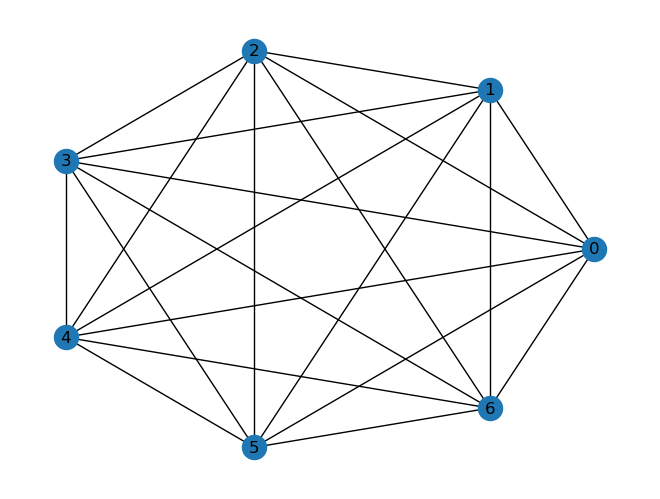

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# extracting a subgraph from a K7 complete graph
G = nx.complete_graph(7)
nx.draw(G, nx.circular_layout(G), with_labels=True)

Text(0.5, 1.0, 'Subgraph of nodes 2,3,4, and 6 from a k7 graph')

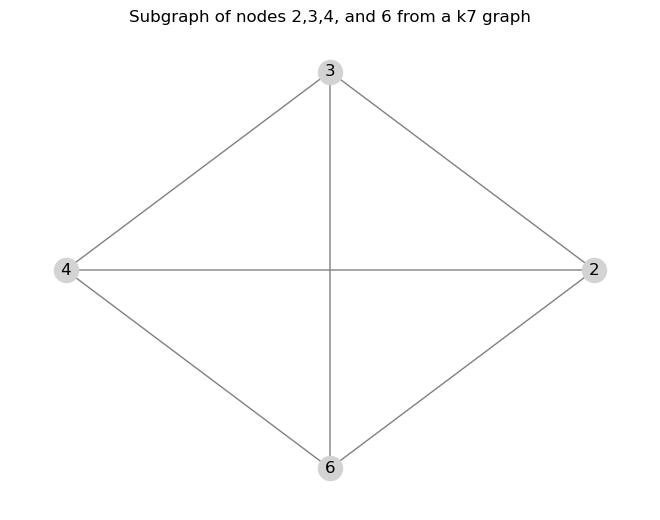

In [ ]:
subgraph = G.subgraph([2,3,4,6])
nx.draw_circular(subgraph, with_labels=True, arrows=True, node_color='lightgray', edge_color='gray')
plt.title("Subgraph of nodes 2,3,4, and 6 from a k7 graph")

## Joining

We can also connect graphs.

Here, I’m defining a k4 graph (so, nodes {0,1,2,3}) and a k3 graph (nodes {0,1,2}) and then I’m re-naming the nodes in the k3 graph to {4,5,6}, which is necessary because when you combine two graphs, it will merge nodes with the same value. We can also define a third graph, with nodes {0,4} and a connection between them. If we combine all three of those graphs, we’ll get the following:

In [25]:
"""creating three graphs and connecting them together
"""

# Create two separate graphs
G1 = nx.complete_graph(4)  # First complete graph K4
G2 = nx.complete_graph(3)  # Second complete graph K3
nx.relabel_nodes(G2, {i: i + 4 for i in G2.nodes()}, copy=False)  # Shift node labels

# Merge the two graphs by adding a bridge edge
G_combined = nx.compose(G1, G2)
G_combined.add_edge(0, 4)  # Connect Graph 1 to Graph 2

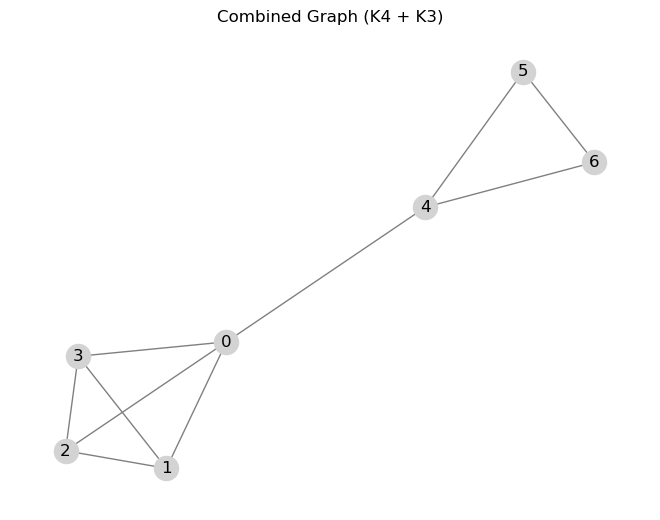

In [26]:
# Function to plot a graph
def plot_graph(G, title=None, pos=None):
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', arrows=True)
    if title:
        plt.title(title)
    plt.show()
    return pos

# Plot the combined graph
pos = plot_graph(G_combined, "Combined Graph (K4 + K3)")

## Disconnecting

If we remove the edge (0,4) from this graph, we’ll get a single graph with two “islands”, islands being isolated components of the graph that share no connections.

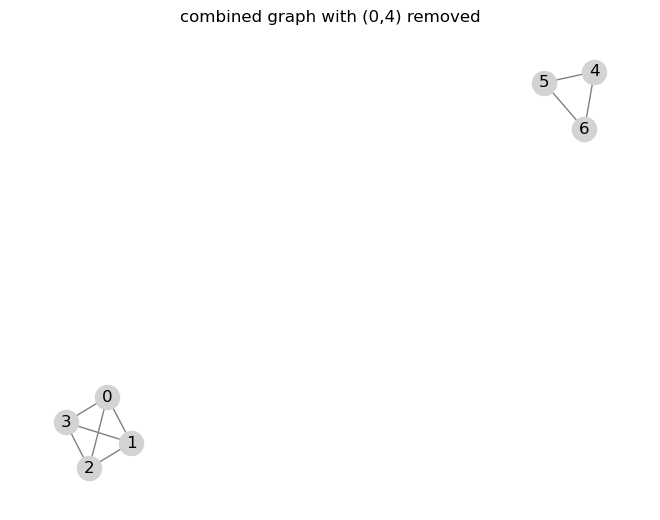

In [27]:
# Remove the connecting edge
G_combined.remove_edge(0, 4)
plot_graph(G_combined, 'combined graph with (0,4) removed')
plt.show()

We can use the `connected_components` function to get the list of components for each island and use the subgraph function to extract those components into separate subgraphs.

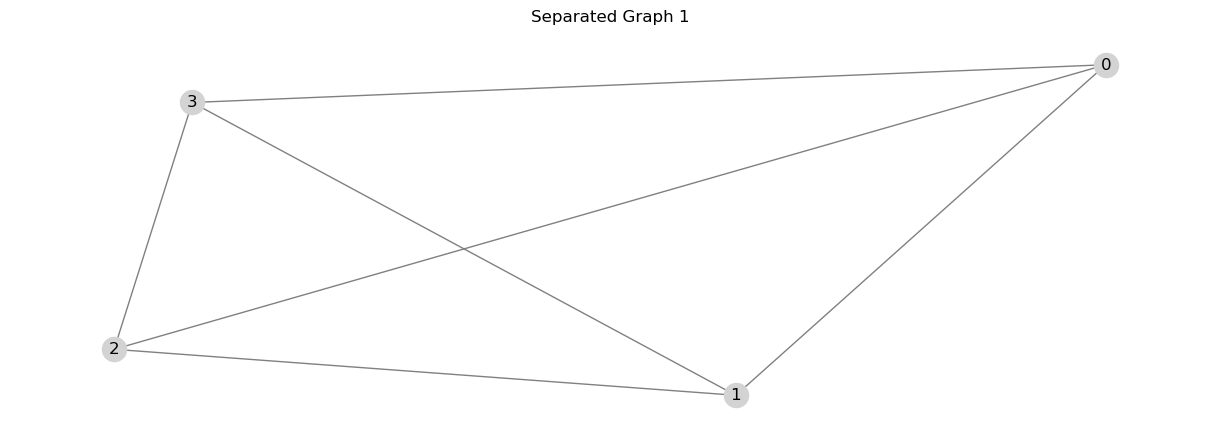

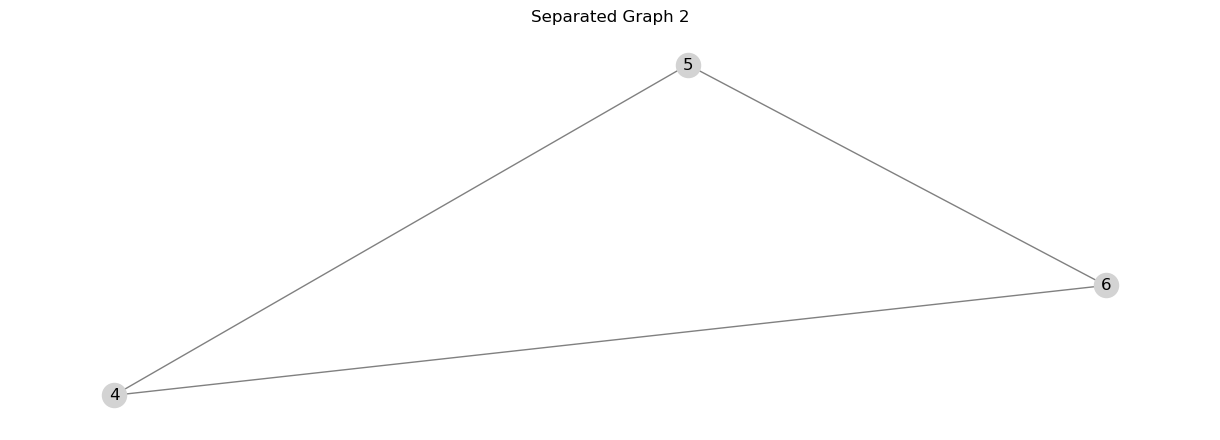

In [14]:
# Detect connected components (islands)
subgraphs = [G_combined.subgraph(c).copy() for c in nx.connected_components(G_combined)]

# Step 3: Plot each separated component
for i, subG in enumerate(subgraphs):
    plot_graph(subG, f"Separated Graph {i+1}", pos)

Combining, separating, and renaming graphs is fundamental in most practical applications of graphs as it allows for granular analysis and exploration.

Now that we’re getting more familiar with graphs, I think it might be useful to cover a few important metrics that data scientists use to describe graphs.

# Key Graph Metrics

## Degree, in degree, out degree

If you want to count the number of connections a particular node has, we call that the “degree”. For an undirected graph, the degree of a node is the number of connections.

degree of each node (node, degree):  [(1, 3), (2, 2), (3, 2), (4, 1)]


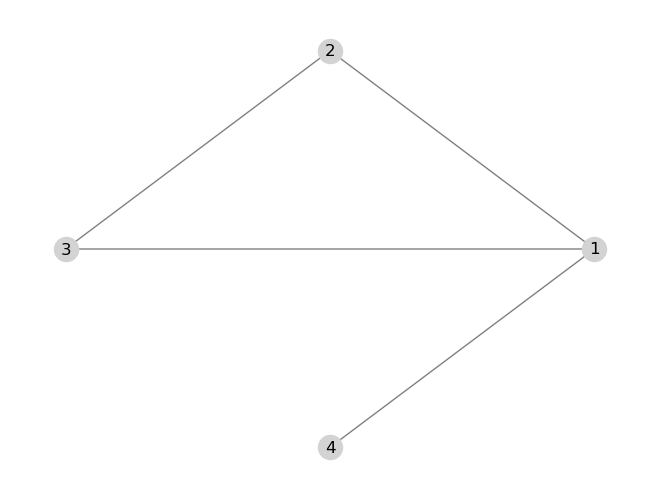

In [16]:
graph = nx.Graph([(1, 2), (2, 3), (3, 1), (4, 1), (1, 3)])
nx.draw_circular(graph, with_labels=True, arrows=True, node_color='lightgray', edge_color='gray')
plt.plot()
print('degree of each node (node, degree): ', graph.degree)

Node 1 is degree 3, because it has three connections. Node 2 is degree 2, because it has two connections. Etc.

The degree of a node becomes a bit more complex when we consider directed graphs. In directed graphs, the “in degree” is the number of connections going into the node, the “out degree” is the number of connections going out of the node, and the “degree” is the sum of the in and out degrees:

$$ {\rm degree} = {\rm in \ degree} + {\rm out \ degree} $$


degree:      {0: 4, 1: 3, 2: 5, 3: 2}
in degree:   {0: 3, 1: 1, 2: 2, 3: 1}
out degree:  {0: 1, 1: 2, 2: 3, 3: 1}


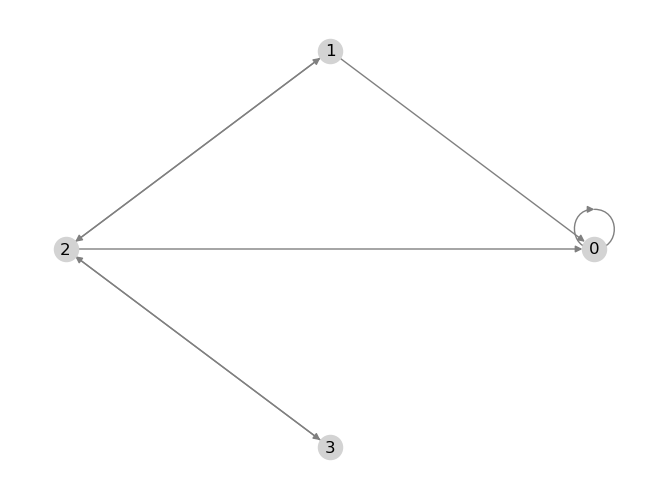

In [19]:
edges = [(0, 0), (1, 0), (1, 2), (2, 0), (2, 1), (2, 3), (3, 2)]
graph = nx.DiGraph(edges) # directed 

print('degree:     ', dict(graph.degree))
print('in degree:  ', dict(graph.in_degree))
print('out degree: ', dict(graph.out_degree))

nx.draw_circular(graph, with_labels=True, arrows=True, node_color='lightgray', edge_color='gray')

Depending on the context in which a graph is being applied, the degree might correspond to the number of friends someone has, the number of transactions an entity makes, whatever.

## Shortest path

Another super useful metric is the shortest path between two nodes, which can be calculated with `nx.shortest_path`. That takes in a graph, start, and end node and spits out a list of nodes.

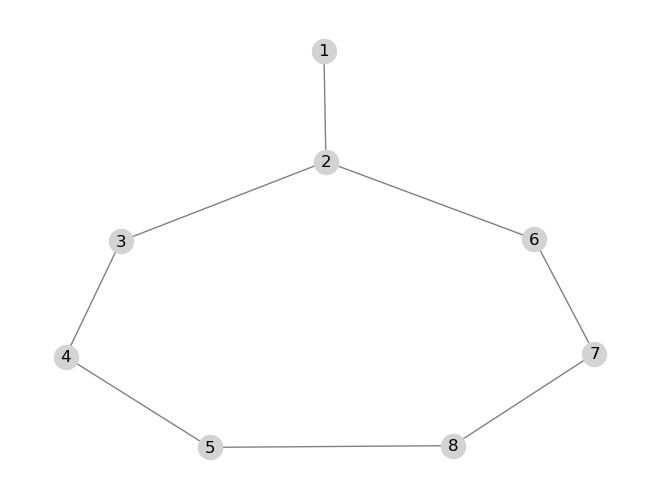

Shortest path from 1 to 5: [1, 2, 3, 4, 5]


In [28]:
"""Creating a graph and finding the shortest path between nodes 1 and 5
"""

# Create a sample graph
G = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5), (2, 6), (6, 7), (7, 8), (8,5)])

# Draw nodes
plot_graph(G)

shortest_path = nx.shortest_path(G, source=1, target=5)
print(f"Shortest path from 1 to 5: {shortest_path}")

## Radius and eccentricity

“Radius” and “eccentricity” are other key metrics, which are built on top of the shortest distance. 

The “eccentricity” of a node is the *longest shortest path that node has to any other node*. You might imagine that nodes on the outer borders of a graph might have a very long shortest path to nodes on the other side of the graph, while nodes in the middle might have a relatively short shortest path to all other nodes. Thus, the “eccentricity” is a measure of how eccentric (on the edge) a particular node is.

The “Radius” of a graph is the smallest eccentricity, which can be thought of as how wide a graph is from the center.

The following code calculates the radius of a graph and the eccentricity of all nodes in that graph and highlights the nodes whose eccentricity is equal to the radius. These nodes are “central”, meaning they’re in the middle of the graph.

eccentricities:  {1: 4, 2: 3, 3: 3, 4: 4, 5: 5, 6: 4, 7: 5, 8: 5}


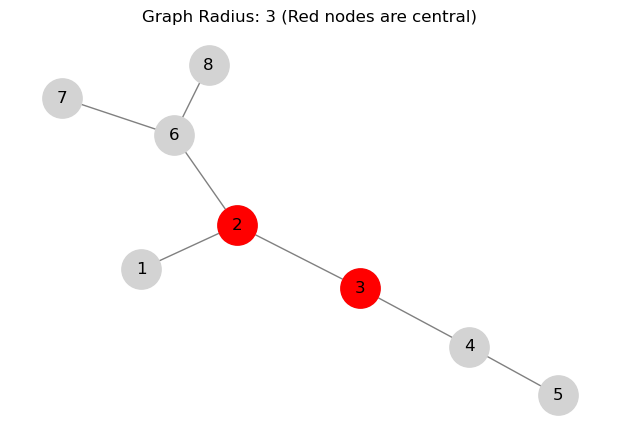

In [29]:
"""calculating the eccentricity (longest shortest path) for each node
and the radius (shortest eccentricity of all nodes) of the graph
"""

import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5), (2, 6), (6, 7), (6, 8)])

# Compute eccentricities (greatest shortest path)
eccentricities = nx.eccentricity(G)
print('eccentricities: ', eccentricities)

# Compute radius (minimum eccentricity)
radius = nx.radius(G)

# Find the central node(s) (nodes with eccentricity equal to the radius)
central_nodes = [node for node, ecc in eccentricities.items() if ecc == radius]

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(6, 4))

# Draw nodes
nx.draw(G, pos, with_labels=True, node_color="lightgray", edge_color="gray", node_size=800, font_size=12)

# Highlight central nodes
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_color="red", node_size=800)

# Show the radius
plt.title(f"Graph Radius: {radius} (Red nodes are central)")
plt.show()

The radius of this graph is 3.

Here, we defined centrality based on eccentricity, but there are other ways to define which nodes are central, which may be useful in other applications.

## Understanding Eccentricity

When we talk about **eccentricity** we are always talking about it *with respect to a single vertex* inside a *connected* graph (undirected unless stated otherwise).

### 1. Definitions

1. **Shortest-path distance, d(u,v)**  
   The length (usually the edge count or total weight) of the shortest path between two vertices *u* and *v*.

2. **Eccentricity of a vertex v, ε(v)**  
   ε(v) = max { d(v, x) | x ∈ V }  
   In words: look at every other vertex *x* in the graph, compute the shortest-path distance from *v* to *x*, and take the largest of those distances. That largest distance is *v*’s eccentricity.

3. **Graph-wide notions derived from eccentricity**  
   • **Radius** = min ε(v) over all vertices – the “tightest” eccentricity.  
   • **Diameter** = max ε(v) over all vertices – the “loosest” eccentricity.  
   • **Center** = the set of vertices whose eccentricity equals the radius.  
   • **Peripheral vertices** = vertices whose eccentricity equals the diameter.

### 2. Intuition

Imagine you stand on vertex *v* and send out echoes that travel one edge per time unit. Your eccentricity is how long you must wait before the echo has reached *every* vertex in the graph and come back telling you it got there.  
• Small ε(v)  →  *v* is “centrally” located.  
• Large ε(v)  →  *v* is “out on the fringe”.

### 3. Mini Example

Consider the graph:

```
A – B – C – D
        \
          E
```

Edges: (A,B), (B,C), (C,D), (C,E)

Shortest-path distances:

| from\to | A | B | C | D | E |
|---------|---|---|---|---|---|
| A       | 0 | 1 | 2 | 3 | 3 |
| B       | 1 | 0 | 1 | 2 | 2 |
| C       | 2 | 1 | 0 | 1 | 1 |
| D       | 3 | 2 | 1 | 0 | 2 |
| E       | 3 | 2 | 1 | 2 | 0 |

Eccentricities (max of each row):

ε(A) = 3  
ε(B) = 2  
ε(C) = 2  
ε(D) = 3  
ε(E) = 3  

• Radius = 2 (minimum of the list)  
• Diameter = 3 (maximum of the list)  
• Center = {B, C}  
• Peripheral vertices = {A, D, E}

### 4. Why Care?

Eccentricity-based concepts appear in:

• Network centrality analysis (who is “closest” to everyone).  
• Facility location (place warehouses to minimise delivery time → radius).  
• Graph layout heuristics.  
• Routing and broadcasting in distributed systems.  
• Chemistry (topological indices of molecules).

---

**Key takeaway:**  
Eccentricity of a vertex v is simply “the greatest distance from v to any other vertex.” Everything else—radius, diameter, center—are built from those individual eccentricities.

## Radius – the “best possible” eccentricity

### 1 . Formal definition  
Radius(G) = r = min { ε(v) │ v ∈ V }  
In words:  
• Compute every vertex’s eccentricity.  
• Pick the smallest one.  
That minimum value is the **radius**; any vertex that attains it is called a **center**.

(Because radii and diameters are numbers, we usually write `rad(G)` and `diam(G)`, while ε(v) is per-vertex.)

### 2 . Intuition    

The radius captures the “intrinsic centrality” of the whole graph: *if you can choose the best location, what is the worst-case distance you still have to cover?*

### 3 . Example revisited  

Using the previous graph

```
A – B – C – D
        \
          E
```

Eccentricities we computed:  ε(A)=3, ε(B)=2, ε(C)=2, ε(D)=3, ε(E)=3  
Radius = min{3,2,2,3,3} = **2**  
Centers = {B, C}  
Diameter = 3  
Check: 2 ≤ 3 ≤ 2·2 ✔️

### 4 . Why the radius matters  

• Facility-location: minimum worst-case delivery distance if you can place one warehouse.  
• Network design: minimum broadcast time from an optimally chosen node.  
• Molecule descriptors: graph-radius appears in chemical topological indices.  
• Social graphs: centrality measure called **eccentricity centrality** = 1/ε(v); the maximum of that score equals 1/radius.  


**Take-away:**  
Radius is the smallest eccentricity in the graph—think of it as the optimistic worst-case distance available if you are free to choose the “most central” vertex.